# 12. 큐(Queues)

- 자료(data element)를 보관할 수 있는 선형 구조
- 단, 넣을 때는 한쪽 끝에서 밀어 넣어야 하고 **(인큐(enqueue)연산)**      
  꺼낼 때에는 반대쪽에서 꺼내야 하는 제약이 존재함 **(디큐(dequeue)연산)**
> **선입 선출(FIFO - First in First out)** 특징을 가지는 선형 자료 구조

-----


## 1) 큐의 동작

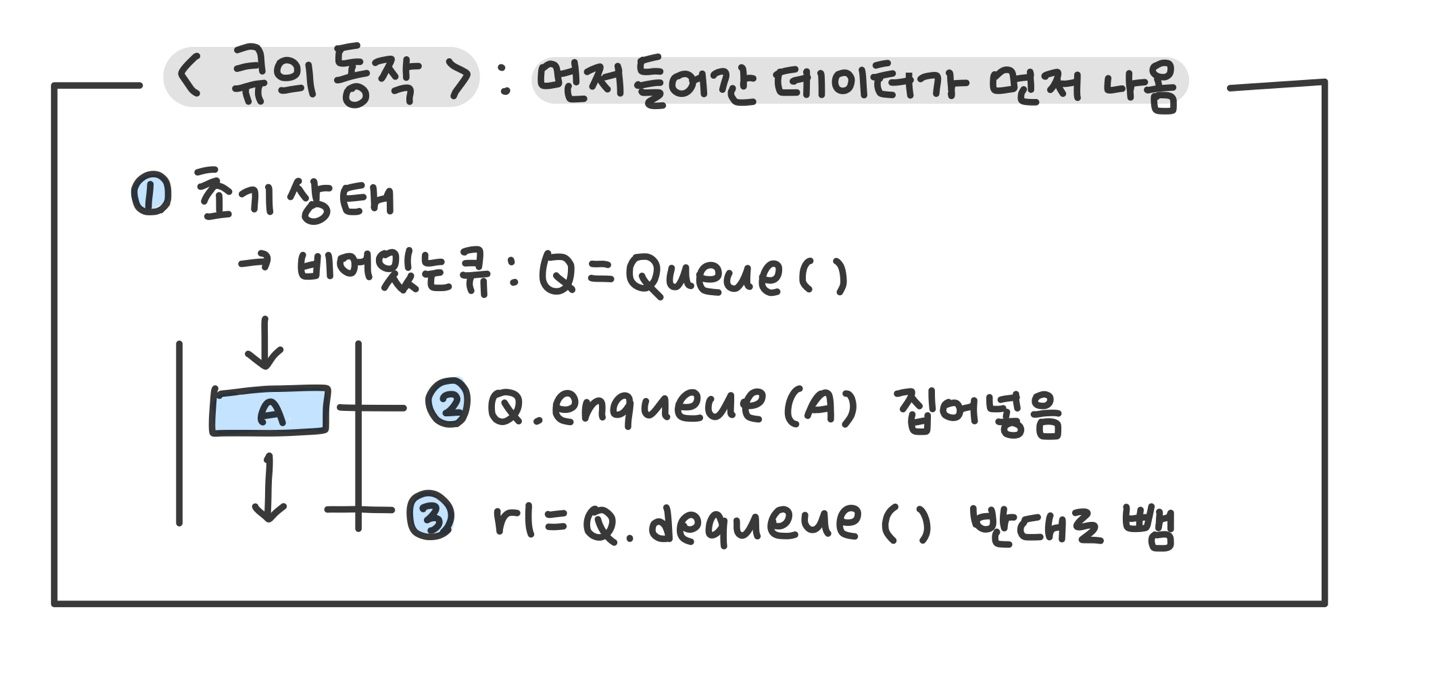

-----

## 2) 큐의 연산   

> 스택과 다소 비슷함

- size() : 현재 큐에 들어있는 데이터 원소의 수를 구함
- isEmpty() : 현재 큐가 비어있는지를 판단
- enqueue(X) : 데이터 원소 X를 큐에 추가
- dequeue() : 큐의 맨 앞에 저장된 데이터 원소를 제거
- peek() : 큐의 맨 앞에 저장된 데이터 원소를 반환(제거하지 않음)

-------

## 3) 큐 구현하기

### 1. 배열로 구현

In [3]:
# 스택의 연산과 비슷
class ArrayQueue:
    def size(self):
        return len(self.data)
    
    def isEmpty(self):
        return self.size==0
    
    def enqueue(self, item):
        self.data.append(item)
        
    def dequeue(self):
        return self.data.pop(0)   # 0번 인덱스의 원소를 리턴(괄호 안에 인덱스)
    
    def peek(self):
        return self.data[0]

### 2. 배열로 구현한 큐의 연산 복잡도

|연산|복잡도|
|---|---|
|size()|O(1)|
|isEmpty()|O(1)|
|enqueue()|O(1)|
|dequeue()|**O(n)**|
|peek()|O(1)|




- dequeue연산 : 큐의 길이에 비례한 복잡도를 가진다  
> 특정 인덱스의 원소를 꺼내면 뒤에 원소가 다 앞당겨 와야하기 때문에 큐의 길이가 길수록 복잡도가 많이 든다

### 3. 이중연결리스트로 구현

In [ ]:
class Node:

    def __init__(self, item):
        self.data = item
        self.prev = None
        self.next = None


# 이중 연결 리스트
class DoublyLinkedList:

    def __init__(self):
        self.nodeCount = 0
        self.head = Node(None)
        self.tail = Node(None)
        self.head.prev = None
        self.head.next = self.tail
        self.tail.prev = self.head
        self.tail.next = None


    def __repr__(self):
        if self.nodeCount == 0:
            return 'LinkedList: empty'

        s = ''
        curr = self.head
        while curr.next.next:
            curr = curr.next
            s += repr(curr.data)
            if curr.next.next is not None:
                s += ' -> '
        return s


    def getLength(self):
        return self.nodeCount


    def traverse(self):
        result = []
        curr = self.head
        while curr.next.next:
            curr = curr.next
            result.append(curr.data)
        return result


    def reverse(self):
        result = []
        curr = self.tail
        while curr.prev.prev:
            curr = curr.prev
            result.append(curr.data)
        return result


    def getAt(self, pos):
        if pos < 0 or pos > self.nodeCount:
            return None

        if pos > self.nodeCount // 2:
            i = 0
            curr = self.tail
            while i < self.nodeCount - pos + 1:
                curr = curr.prev
                i += 1
        else:
            i = 0
            curr = self.head
            while i < pos:
                curr = curr.next
                i += 1

        return curr


    def insertAfter(self, prev, newNode):
        next = prev.next
        newNode.prev = prev
        newNode.next = next
        prev.next = newNode
        next.prev = newNode
        self.nodeCount += 1
        return True


    def insertAt(self, pos, newNode):
        if pos < 1 or pos > self.nodeCount + 1:
            return False

        prev = self.getAt(pos - 1)
        return self.insertAfter(prev, newNode)


    def popAfter(self, prev):
        curr = prev.next
        next = curr.next
        prev.next = next
        next.prev = prev
        self.nodeCount -= 1
        return curr.data


    def popAt(self, pos):
        if pos < 1 or pos > self.nodeCount:
            raise IndexError('Index out of range')

        prev = self.getAt(pos - 1)
        return self.popAfter(prev)


    def concat(self, L):
        self.tail.prev.next = L.head.next
        L.head.next.prev = self.tail.prev
        self.tail = L.tail


        self.nodeCount += L.nodeCount

In [9]:
# 연결리스트로 큐 구현
class LinkedListQueue:

    def __init__(self):
        self.data = DoublyLinkedList()

    def size(self):
        return self.data.getLength()


    def isEmpty(self):
        return self.size()==0


    def enqueue(self, item):
        node = Node(item)
        self.data.insertAt(self.data.nodeCount+1,node)


    def dequeue(self):
        return self.data.popAt(1)


    def peek(self):
        return self.data.getAt(1).data

def solution(x):
    return 0